# Multiple Linear Regression

Multiple Linear Regression (MLR) is an extension of simple linear regression that models the relationship between two or more independent variables (predictors) and a dependent variable (target). It helps to predict the value of the dependent variable based on the values of the independent variables.

**The formula for Multiple Linear Regression is:**

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n + \epsilon
$$

Where:
- \(Y\) = dependent variable (the outcome you're predicting)
- \($\beta_0$\) = intercept (the value of \(Y\) when all \(X\)'s are 0)
- \($\beta_1, \beta_2, \dots, \beta_n$\) = coefficients (the change in \(Y\) for a one-unit change in each independent variable \(X\))
- \($X_1, X_2, \dots, X_n$\) = independent variables (the predictors)
- \($\epsilon\$) = error term (captures the difference between the actual and predicted values)

**Key concepts:**
1. **Coefficients**: Each independent variable \($X_i$\) has a corresponding coefficient \($\beta_i$\), which tells you how much \($Y$\) is expected to change when \($X_i$\) changes by one unit, keeping all other variables constant.
   
2. **Assumptions**:
   - **Linearity**: The relationship between the dependent and independent variables is linear.
   - **Homoscedasticity**: The variance of errors should be constant across all levels of the independent variables.
   - **Multivariate Normality**: Normality of error distribution. If we look along the line of linear distribution, we will see a normal distribution of our data point.
   - **Independence**: Observations should be independent of each other.
   - **No Multicollinearity**: Independent variables should not be highly correlated with each other.
   - **The Outlier Check**: Consider removing the outliers before building the linear regression.

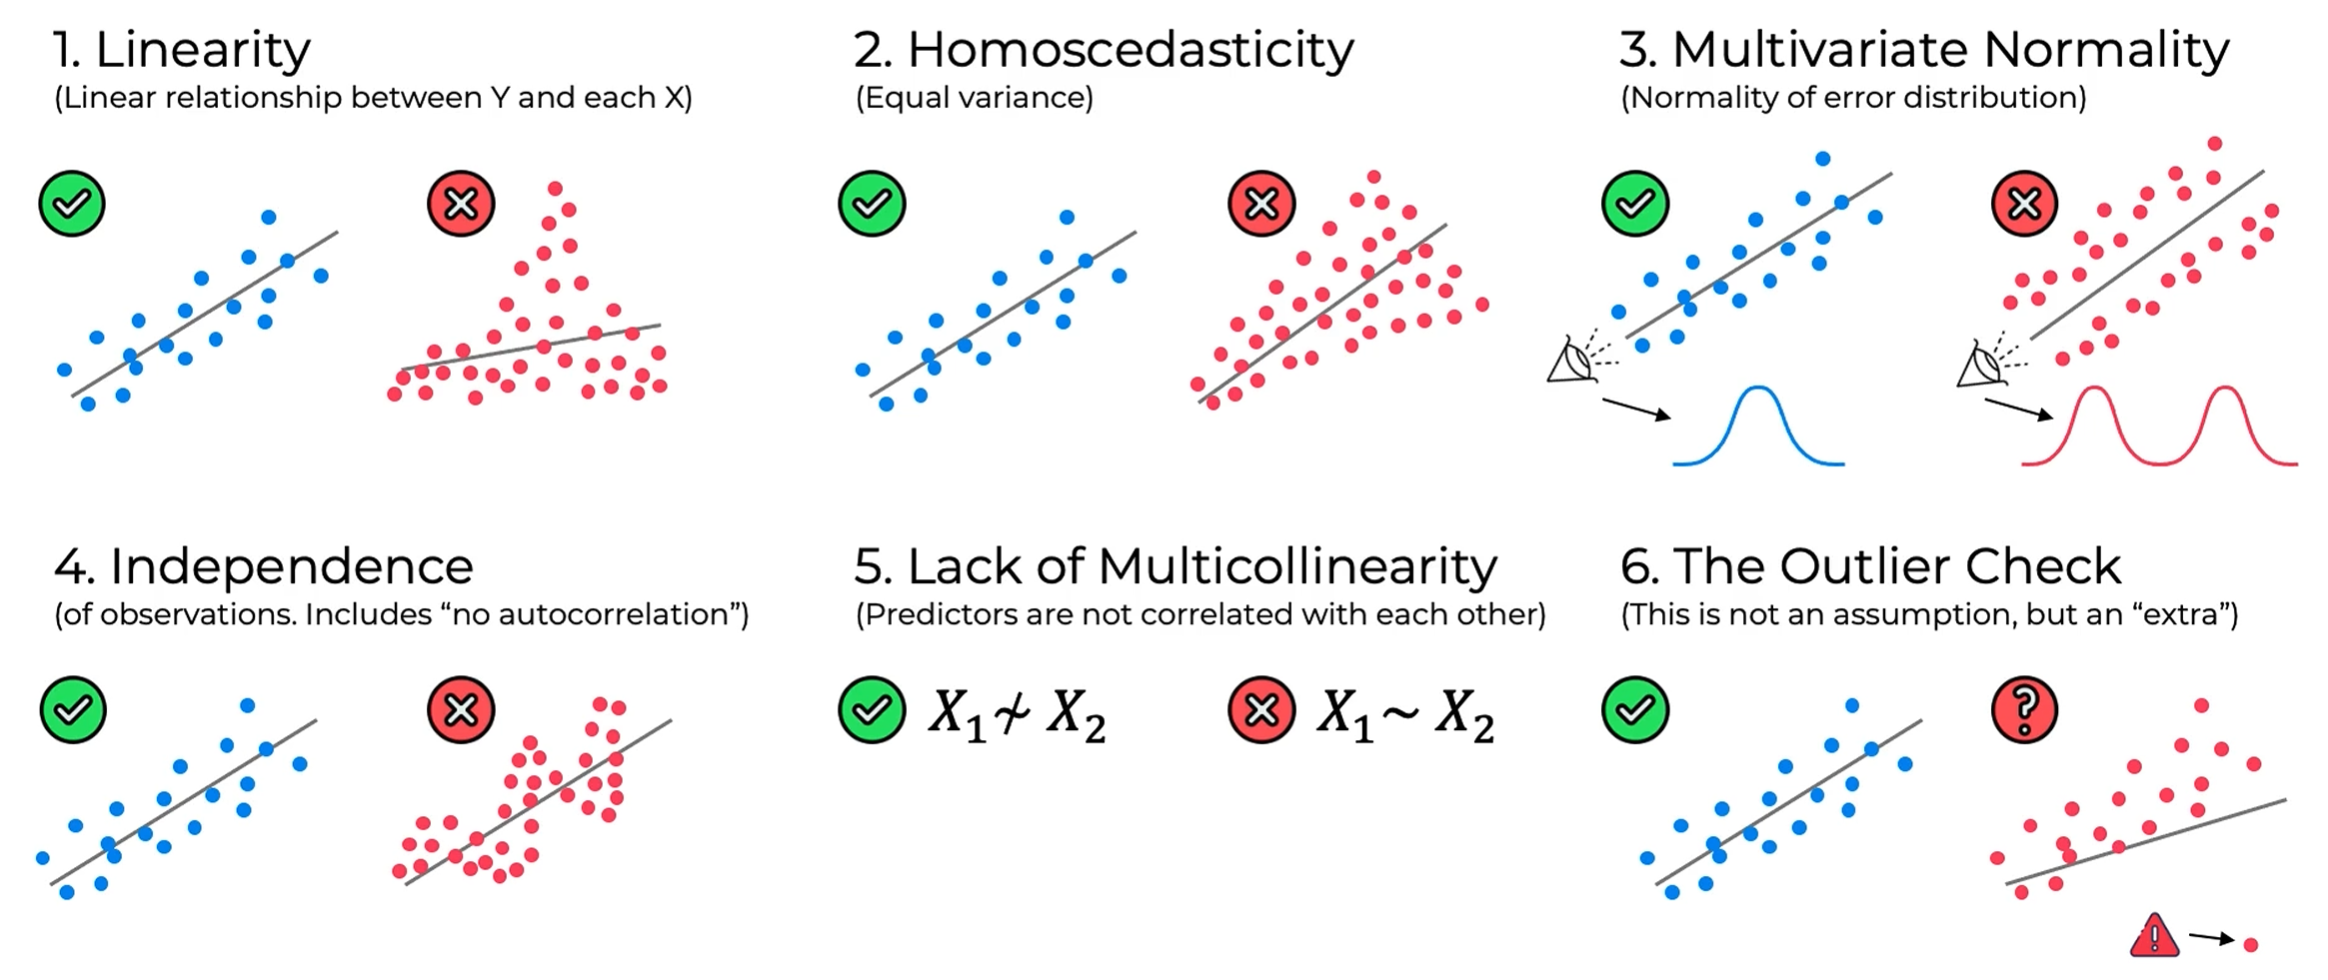


3. **Fit & Interpretation**:
   - The model is usually fitted using a method called **Ordinary Least Squares (OLS)**, which minimizes the sum of squared differences between the actual and predicted values.
   - **\($R^2$\)**: A goodness-of-fit measure that explains how much of the variance in the dependent variable is explained by the independent variables.

In practice, MLR is widely used for predicting outcomes based on multiple factors, like predicting house prices based on size, location, and other features.

Example: [The Application of Multiple Linear Regression and Artificial Neural Network Models for Yield Prediction of Very Early Potato Cultivars before Harvest](https://www.mdpi.com/2073-4395/11/5/885)

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 2 - Regression/2 Multiple Linear Regression/50_Startups.csv')
X = dataset.iloc[:, :-1].values # matrix of features
y = dataset.iloc[:, -1].values # dependent variable vector

In [12]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In our dataset, the last column (`'New York'`, `'California'`, `'Florida'`) represents a **categorical variable**, meaning that it contains values that represent categories or labels rather than numeric values. Since most machine learning models work with numeric data, we need to convert this categorical data into a numerical format. This process is called **encoding**.

The **OneHotEncoder** is a technique to encode categorical variables. It creates a new binary column (0 or 1) for each unique category in the column. For example, for the `'State'` column with the values `'New York'`, `'California'`, and `'Florida'`, OneHotEncoder will create three columns: one for each state. For each row, only one of these columns will have the value 1 (indicating the presence of that state), and the others will have 0.

The result is a matrix where the categorical variable has been encoded as numeric columns, allowing our machine learning model to use this data effectively.



In [13]:
# Import ColumnTransformer to apply transformations to specific columns
from sklearn.compose import ColumnTransformer
# Import OneHotEncoder to convert categorical data to numeric (one-hot encoding)
from sklearn.preprocessing import OneHotEncoder

# Create a ColumnTransformer object.
# The 'transformers' argument specifies the transformations:
# ('encoder', OneHotEncoder(), [3]) means we apply OneHotEncoder to the 3rd column (index 3) which is the categorical 'State' column.
# 'remainder="passthrough"' means all other columns will remain unchanged (passed through).
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

# Apply the transformations defined in ColumnTransformer to the feature matrix X.
# The result is converted into a numpy array to be used by ML algorithms.
X = np.array(ct.fit_transform(X))

In the result I get after applying the **OneHotEncoder**, the new columns representing the categorical variable (the states: `'New York'`, `'California'`, and `'Florida'`) are the first three columns of the matrix.

In [14]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

**The Dummy Variable Trap:**

Be careful with Multicollinearity:

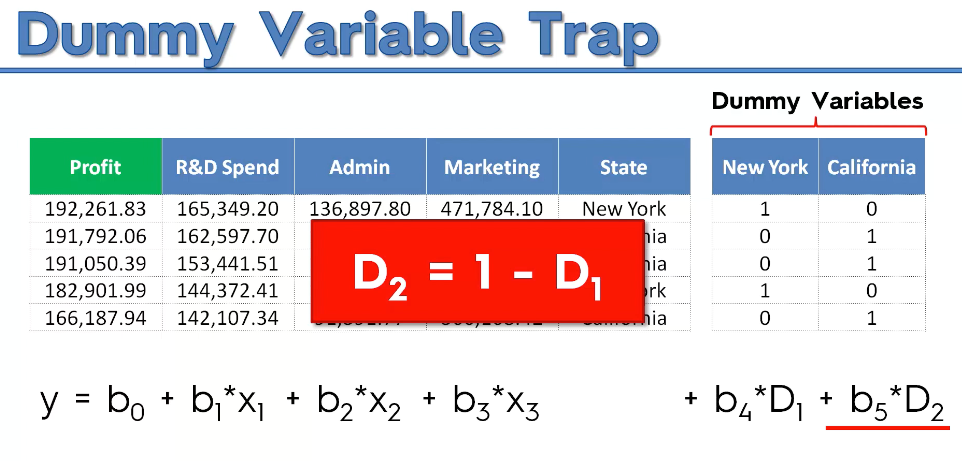


When you have a **categorical variable** with only two different values (e.g., "New York" and "California"), and you create a column for each state, you can run into **multicollinearity** due to a situation called the **dummy variable trap**.

**Explanation:**

- When you use **OneHotEncoding** on a categorical variable with two values (e.g., `"New York"` and `"California"`), you will create two new binary columns. For each observation, these columns will be perfectly correlated because:
  - If the first column ("New York") is 1, the second column ("California") must be 0.
  - If the first column is 0, the second column must be 1.
  
This creates **perfect multicollinearity**, where one column is completely predictable from the other. This redundancy is problematic for regression models, as they rely on independent variables to make predictions.

**Solution:**

To avoid this, you need to drop one of the dummy variables. This is known as **dropping one category** or **dropping the reference category**:
- For example, if you drop the `"California"` column, the model can infer that if the `"New York"` column is 0, the observation must be from California.

This way, you avoid multicollinearity while retaining the full information in your model.


**Conclusion:** Whenever you're building a model always admit to one dummy variable. This applies irrespective of the number of dummy variables they are in a dummy set:
- If I have 9, then I should only include 8.
- If I have 100, then I should only include 99.


**Considerations for this exercise:**

We do not need to do anything to avoid the Dummy Variable Trap in this exercise because the MLR class `from sklearn.linear_model import LinearRegression` that we will import and build the MLR with, and train it, will automatically avoid this trap.

## P-value and Statistical Significance (using a coin example)

Let's break it down with your hypotheses:

- **\($H_0$\) (Null Hypothesis)**: The coin is fair (i.e., the probability of heads is 0.5).
- **\($H_1$\) (Alternative Hypothesis)**: The coin is not fair (i.e., the probability of heads is not 0.5).

Now, imagine you flip this coin multiple times (e.g., 100 flips) to determine if it's fair. You count how many times you get heads and compare that result to what you'd expect if the coin were fair.

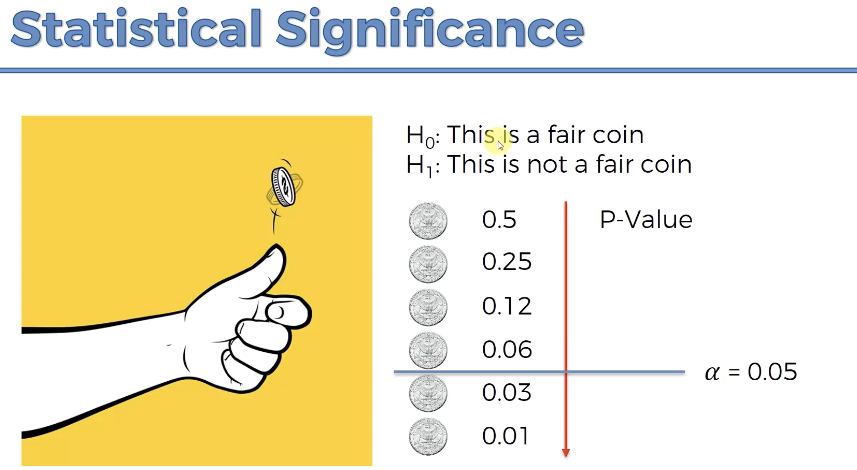


**What is the P-value?**

The **P-value** is the probability of getting a result at least as extreme as the one you observed, assuming the null hypothesis is true. In this case:
- If the coin is fair (\($H_0$\)), you expect heads about 50% of the time.
- After flipping the coin, you get a result—say, 70 heads out of 100 flips.
- The P-value answers the question: **If the coin were truly fair, how likely is it that I would get 70 or more heads in 100 flips just by chance?**

A small P-value (typically less than a threshold like 0.05) suggests that the observed result (70 heads) is **unlikely** under the assumption that the coin is fair, meaning the result is statistically significant.

**Statistical Significance**

If the P-value is smaller than a chosen significance level (usually 0.05), you can reject the null hypothesis \(H_0\) with confidence and say the result is **statistically significant**. This means that there is strong evidence to suggest that the coin is not fair.

### Example Walkthrough:
1. **Flipping the coin**: You flip the coin 100 times and get 70 heads.
2. **P-value calculation**: You calculate the probability of getting 70 or more heads if the coin were fair. If this probability is very small (e.g., 0.02 or 2%), the P-value is 0.02.
3. **Decision**:
   - If your P-value is 0.02 and your significance level is 0.05, you reject \($H_0$\) and conclude that the coin is likely **not fair** (statistical significance).
   - If the P-value were larger (e.g., 0.10 or 10%), you would fail to reject \($H_0$\), meaning there’s not enough evidence to claim the coin is unfair.

**Key Concepts:**
- **Small P-value (< 0.05)**: Strong evidence against \($H_0$\); you reject the null hypothesis and accept \(H_1\).
- **Large P-value (> 0.05)**: Weak evidence against \($H_0$\); you fail to reject the null hypothesis.

In summary, the P-value helps you assess whether the evidence from your data (e.g., 70 heads) is strong enough to reject the null hypothesis that the coin is fair. If the P-value is small, it suggests the result is unlikely to occur by chance, and the coin might not be fair.

## Feature Scaling
In **Multiple Linear Regression**, feature scaling is generally not required for the model to work properly. We will not use in this example. Here's why:

- **Linear Regression Coefficients**: The coefficients in a MLR model represent the change in the target variable for a one-unit change in the predictor variable, holding other predictors constant. These coefficients are meaningful regardless of the scale of the predictors.

- **No Impact on Fit**: The fit of the model (e.g., \( $R^2$ \), residuals) is not affected by the scale of the features. The model finds the best-fitting line (or hyperplane) based on the least squares criterion, and this criterion is not dependent on the scale of the features.

- **Gradient Descent**: While feature scaling is crucial when using optimization algorithms like gradient descent (to ensure faster and more stable convergence), traditional methods like Ordinary Least Squares (OLS) don't require scaling because they solve for the coefficients directly through matrix operations.

Exceptions:

- **Regularization**: If you are using regularization techniques (like Lasso or Ridge regression), feature scaling is important. Regularization methods add penalties based on the magnitude of the coefficients, and if features are on different scales, it can lead to uneven penalization.

In summary, while feature scaling is not necessary for fitting a multiple linear regression model, it becomes important when you use regularization or other algorithms that are sensitive to the scale of the features.

## Building a Model

We have to select which variables will we use. If we insert garbage to our model, at the end of the day we will have garbage as a result. Also at the end of the day we need to explain "the why" to our colleagues, so selecting the right variables will help us to explain our model as well.

Methods to select variables:
1. All-in: through in all your variables. If you know that these exact variables are the true predictors, or someone said you have to do so. Or if you're preparing for a backward elimination, this could make sense as well.
2. Backward Elimination
3. Forward Selection
4. Bidirectional Elimination
5. Score Comparison

Sometimes we will hear Stepwise Regression, which means numbers 2, 3 and 4.


Sure! Let me explain this in more detail, focusing on the **Multiple Linear Regression model** and how to select the right variables.

## Building a Model for Multiple Linear Regression

Selecting the right variables for your regression model is crucial for:
- **Model accuracy**: Removing irrelevant variables improves prediction.
- **Interpretability**: It's easier to explain your model if it uses a smaller, meaningful set of variables.
  
Using one of these methods (or a combination of them) helps you avoid the "garbage in, garbage out" problem by ensuring that only relevant predictors are included in the final model.

### Variable Selection Methods
There are different approaches to selecting which predictor variables should be included in the final model. These methods are designed to either: automatically eliminate unhelpful variables, or select the most important variables.


1. **All-in Approach**: You put all the variables into the model from the start. This method is fast but can lead to overfitting and might include variables that don’t actually contribute to the prediction. This approach might make sense if:
  - You **know for certain** that all the variables are relevant (e.g., based on domain expertise or prior research).
  - You're required to include all the variables (e.g., for policy or project reasons).
  - You plan to use **backward elimination** (explained below), which starts with all variables and eliminates irrelevant ones.

2. **Backward Elimination**: Backward elimination is a systematic way of eliminating unimportant variables. It ensures that only the most relevant variables are kept, reducing the risk of overfitting.
  - Start with **all the variables**.
  - Remove the least significant variable (the one with the highest **p-value**, above a chosen threshold like 0.05).
  - Rebuild the model with the remaining variables and repeat the process.
  - Continue this until all remaining variables are statistically significant (below the p-value threshold).

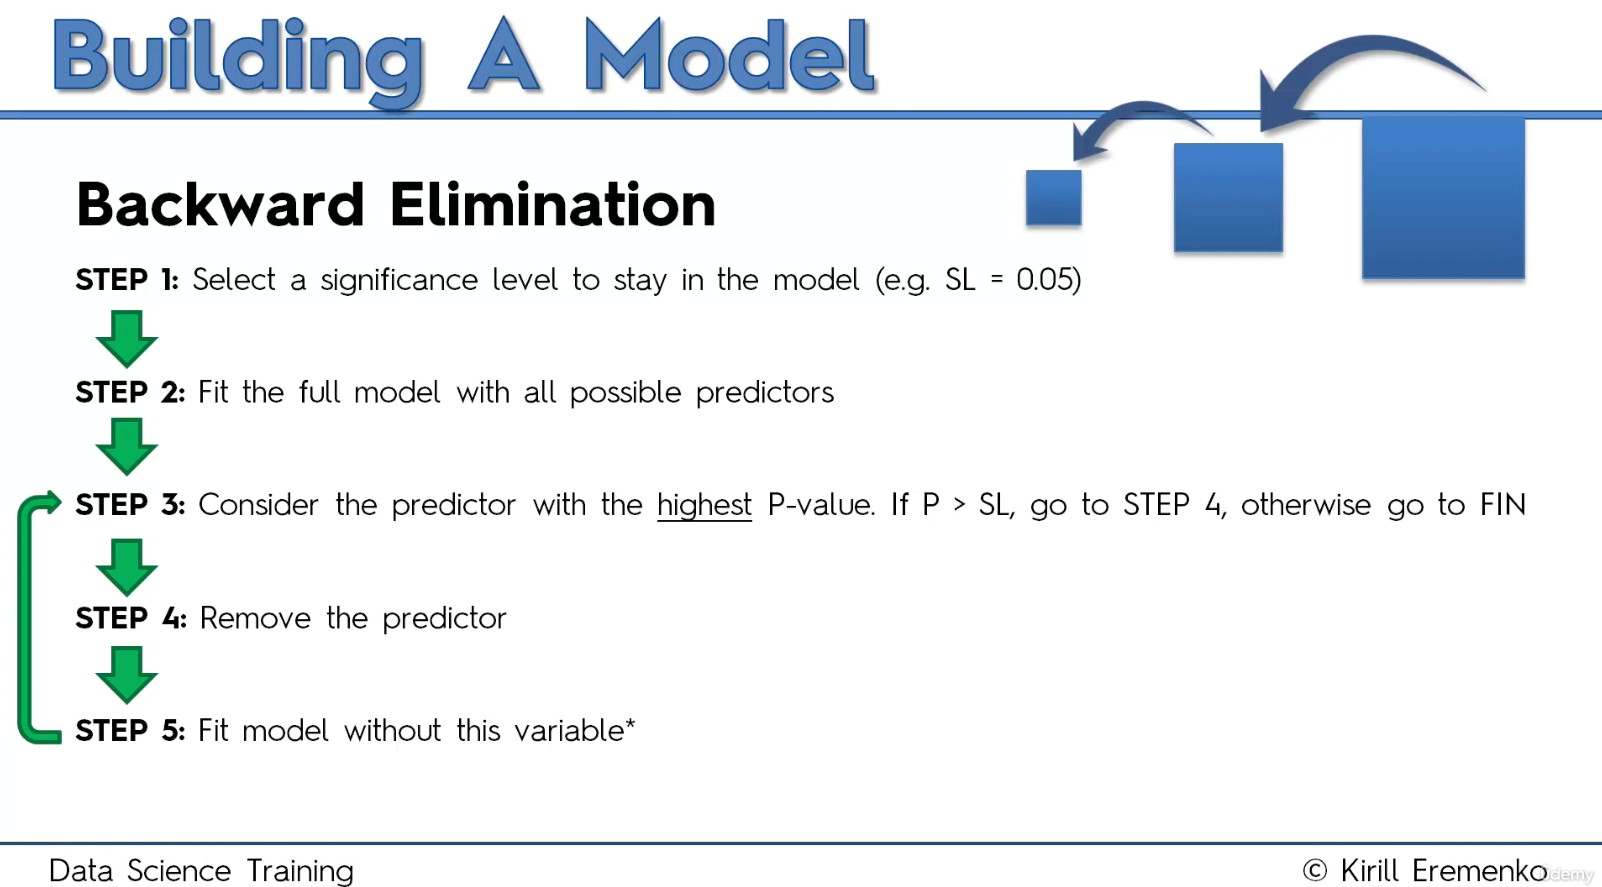

3. **Forward Selection**: The opposite of backward elimination (it's much longer than backward elimination). It’s a useful method when you have many potential predictors and want to gradually build up a good model.
  - Start with **no variables**.
  - Add variables one by one, starting with the most statistically significant.
  - After adding each variable, check if the model improves (based on metrics like p-values or adjusted \( $R^2$ \)).
  - Stop when adding more variables no longer improves the model.

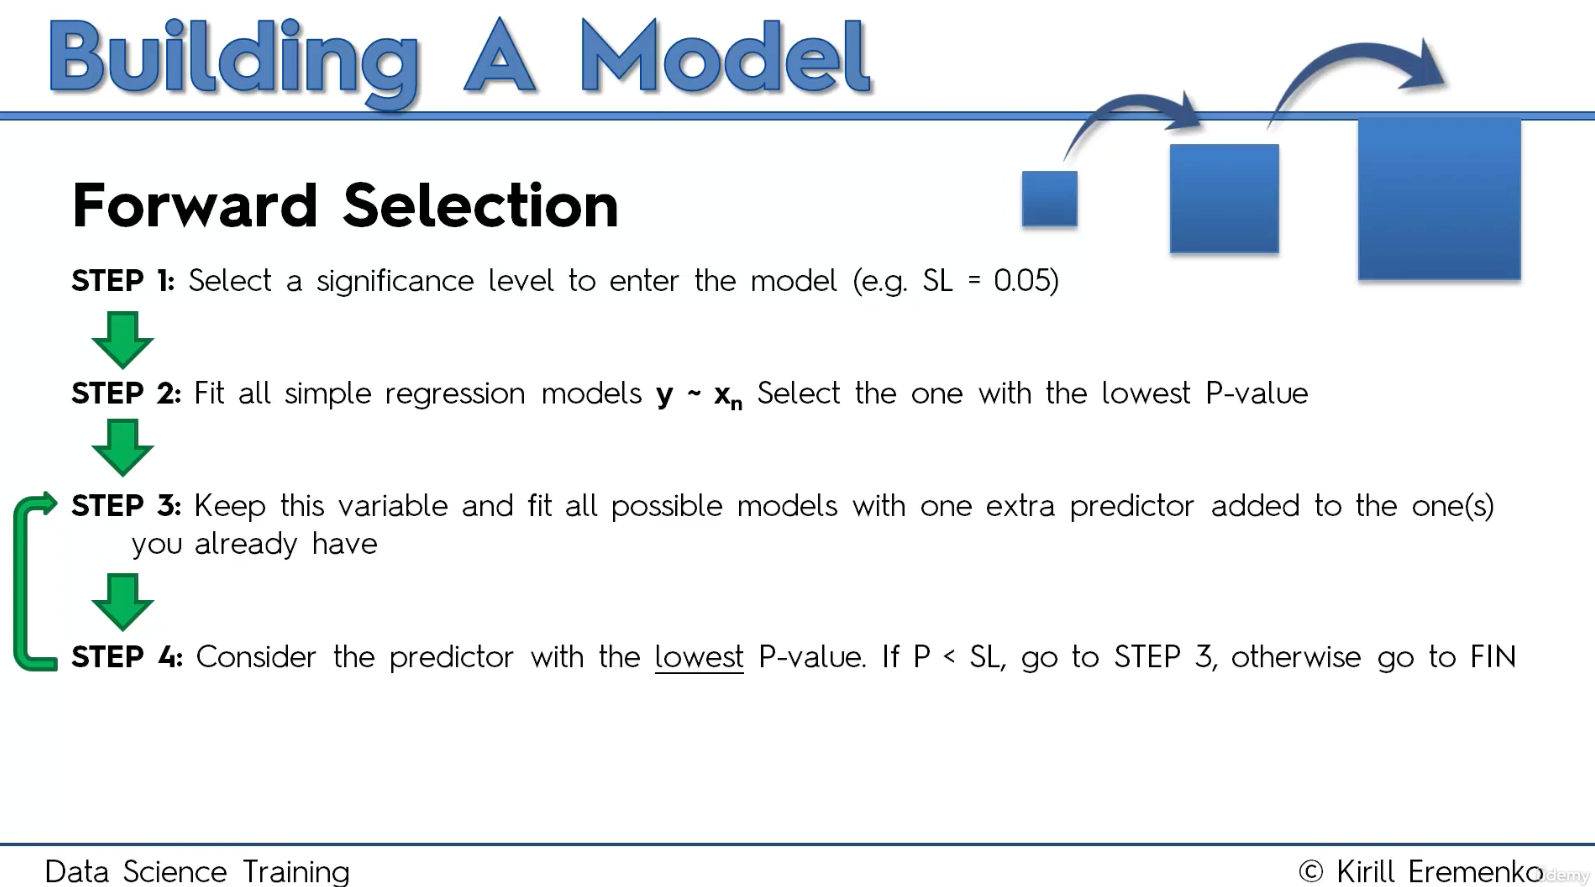


4. **Bidirectional Elimination (Stepwise Regression)**: Bidirectional elimination combines both **backward elimination** and **forward selection**. This method considers both adding and removing variables at each step, balancing between overfitting and underfitting. It is one of the most tedious.
  - Start with no variables or all variables.
  - Add or remove variables step by step.
  - After adding or removing each variable, the algorithm re-evaluates whether previously included variables should be removed.

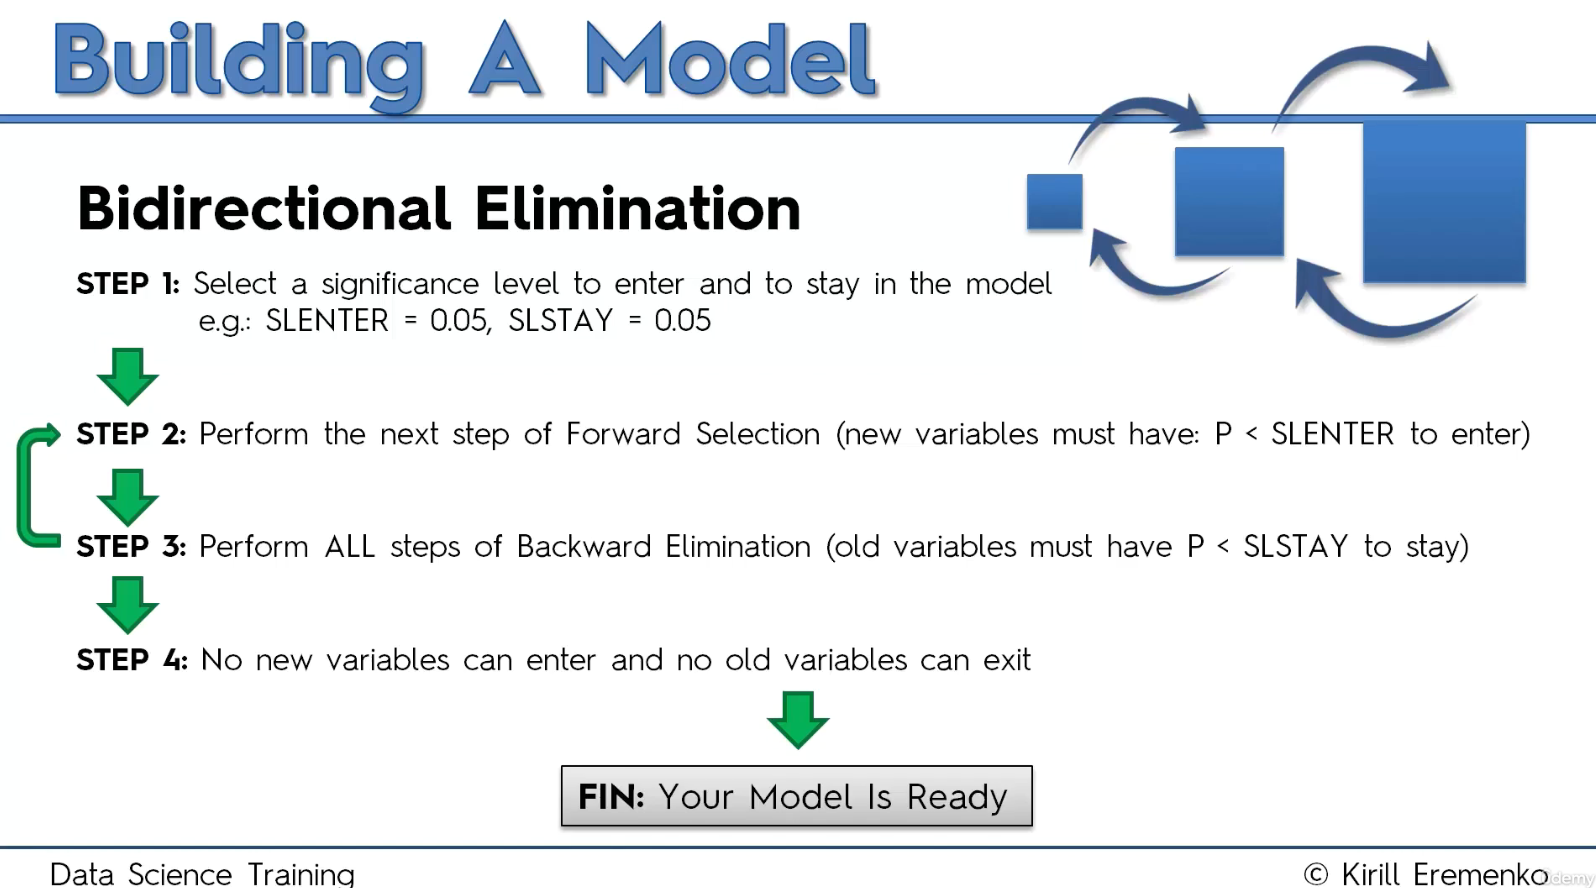

5. **All Possible Models - Score Comparison**: This method involves comparing different combinations of variables based on performance metrics (e.g., adjusted \( $R^2$ \), AIC, or BIC). This allows you to find the most optimal subset of variables by comparing multiple models.
  - Build multiple models with different subsets of variables.
  - Compare their scores (like AIC or BIC, which penalize for adding too many variables).
  - Choose the model with the best balance of complexity and accuracy.

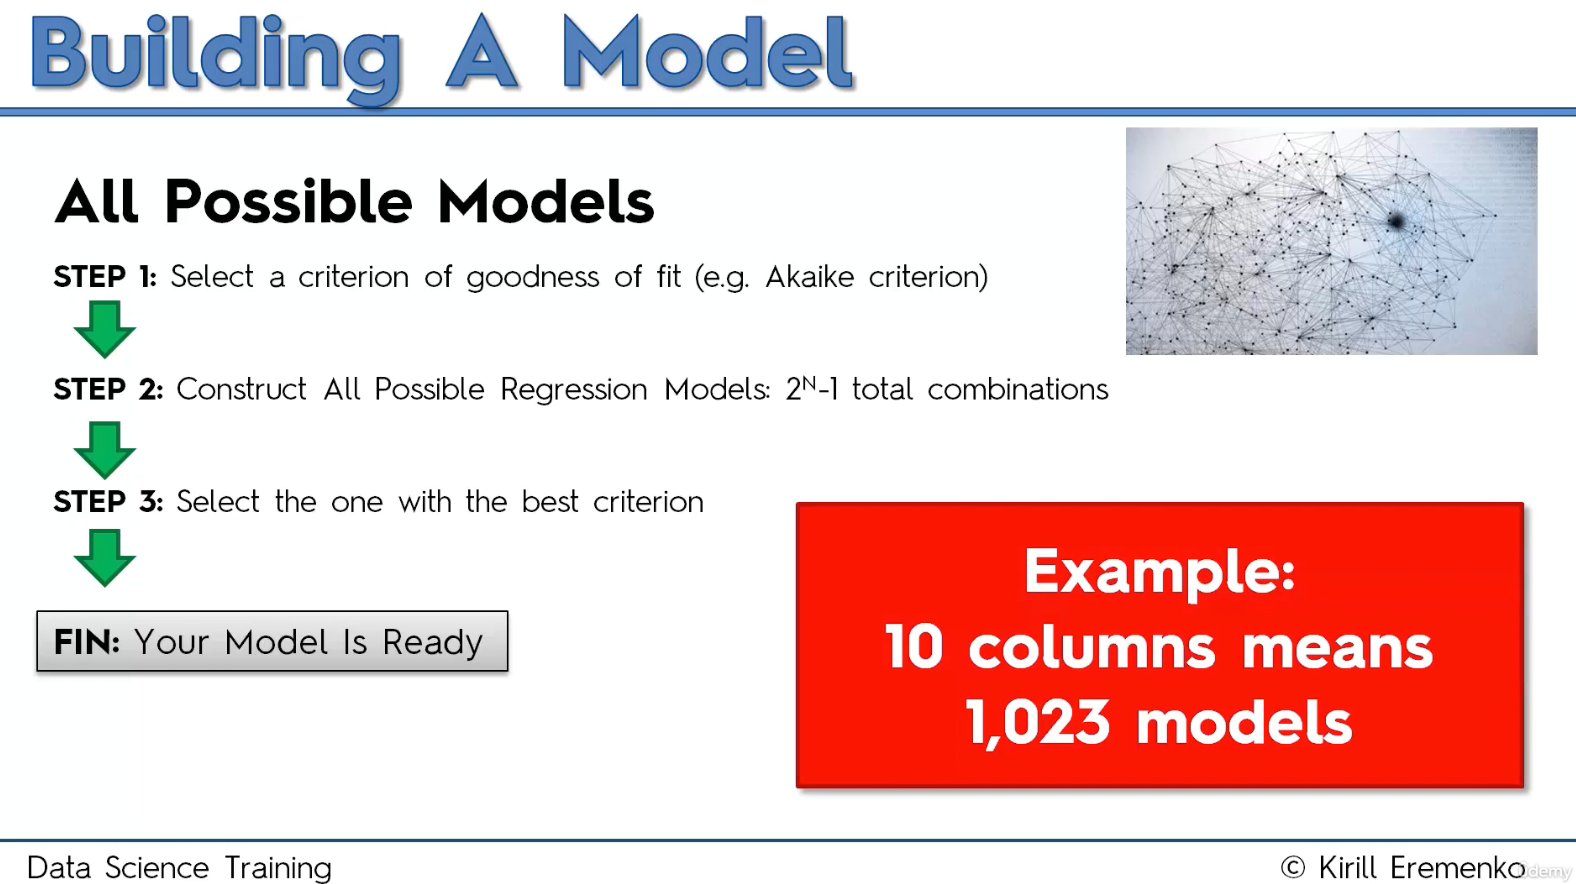

**What is Stepwise Regression?**

Stepwise regression is often a term used to describe the automated methods of variable selection, and it includes:
- **Backward elimination**: Start with all variables and eliminate.
- **Forward selection**: Start with no variables and add.
- **Bidirectional elimination**: A combination of both backward and forward selection.



In this exercise we are going to focus on Backward Elimination, since it is the fastest of all. However, we do not have to deploy the backward elimination technique manually in order to select the features that have the highest P values and that are the most statistically significant. The MLR class `from sklearn.linear_model import LinearRegression` that we will import and build the MLR with, and train it, will automatically identify the best features to predict the dependend variable with the highest accuracy.

## Splitting the dataset into the Training set and Test set

In [15]:
# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X: Features, y: Target variable
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=0 ensures reproducibility of the split (same result each time the code is run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [16]:
# Import the LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Fit the Linear Regression model to the training data
# X_train: Training feature set, y_train: Training target variable
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [17]:
# Use the trained Linear Regression model to make predictions on the test set
# X_test: Testing feature set
y_pred = regressor.predict(X_test)

# Set numpy print options to display numbers with 2 decimal places for better readability
np.set_printoptions(precision=2)

In [24]:
# Reshape y_pred and y_test to be column vectors
y_pred_reshaped = y_pred.reshape(len(y_pred), 1)
y_test_reshaped = y_test.reshape(len(y_test), 1)
print("y_pred_reshaped = ")
print(y_pred_reshaped)
print("y_test_reshaped = ")
print(y_test_reshaped)

# Concatenate the reshaped predicted values and actual values side by side
# axis=1 means concatenating along columns
comparison = np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1)

# Print the resulting comparison array
print("comparison = ")
print(comparison)

y_pred_reshaped = 
[[103015.2 ]
 [132582.28]
 [132447.74]
 [ 71976.1 ]
 [178537.48]
 [116161.24]
 [ 67851.69]
 [ 98791.73]
 [113969.44]
 [167921.07]]
y_test_reshaped = 
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]
comparison = 
[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


The `comparison` array we printed shows a side-by-side comparison of the predicted values (`y_pred`) and the actual values (`y_test`) for your test data.

This comparison helps us visually assess how well our model's predictions match the actual values.

In [26]:
# The last code cell could be compressed like this:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Making a Single Prediction

For example, the profit of a startup with
- R&D Spend = 160000
- Administration Spend = 130000
- Marketing Spend = 300000
- State = 'California'

In [27]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


**Important Note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important Note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final Linear Regression Equation

With the values of the coefficients.

In [28]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

## Bonus: Manual Backward Elimination

As outlined before, Backward Elimination is not necessary in Python due to the Scikit-Learn library's automatic feature selection, which helps ensure accurate predictions.

However, the [Machine Learning A-Z course](https://www.udemy.com/course/machinelearning) provides some resources on how to manually implement Backward Elimination and identify the most statistically significant features, through the following link:

[Backward Elimination Implementation Videos](https://www.dropbox.com/sh/pknk0g9yu4z06u7/AADSTzieYEMfs1HHxKHt9j1ba?dl=0)

Please note that these videos, created using Spyder, use the same dataset and code. The key difference is that the first column was manually removed to avoid the Dummy Variable Trap with the following line of code:

```python
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
```
Here is the complete code for implementing the Backward Elimination technique:

```python
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 1, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 3, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()X_opt = X[:, [0, 3]]
X_opt = X_opt.astype(np.float64)regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
```
